In [1]:
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [2]:
five_sec    = [ 1., 1., 1., 0.96, 0.92, 0.2,  0., 0.]
ten_sec     = [ 1., 1., 1., 1.,   1.,   0.64, 0., 0.]
fifteen_sec = [ 1., 1., 1., 1.,   1.,   0.88, 0., 0.]

sigmas = [r'$0$', r'$10^0$', r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$']

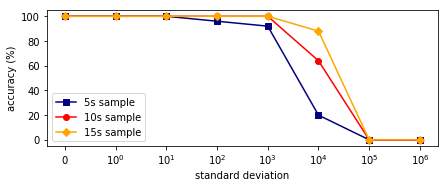

In [11]:
rc('font',**{'family':'sans-serif'})#, 'serif':['Times New Roman']})
# rc('text', usetex=False)

plt.figure(figsize=(7,2.5))
plt.plot(np.arange(len(sigmas)), np.array(five_sec)*100, marker="s", color="navy", label="5s sample")
plt.plot(np.arange(len(sigmas)), np.array(ten_sec)*100, marker="o", color="red", label="10s sample")
plt.plot(np.arange(len(sigmas)), np.array(fifteen_sec)*100, marker="D", color="orange", label="15s sample")
plt.xticks(np.arange(len(sigmas)), labels=sigmas)
plt.ylabel("accuracy (%)")
plt.xlabel("standard deviation")
plt.legend(loc=3)
plt.savefig("noise_experiment.pdf", bbox_inches="tight")
plt.show()

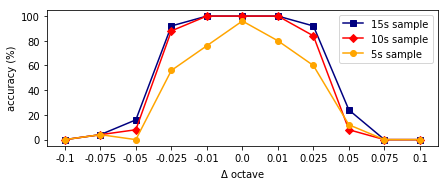

In [12]:
accs_15 = [  0.,   4.,  16.,  92., 100., 100., 100.,  92.,  24.,   0.,   0.]
accs_10 = [  0.,   4.,   8.,  88., 100., 100., 100.,  84.,   8.,   0.,  0.]
accs_5  = [ 0.,  4.,  0., 56., 76., 96., 80., 60., 12.,  0. , 0.]

octaves = [-0.1, -0.075, -0.05, -0.025, -0.01, 0.0, 0.01, 0.025, 0.05, 0.075, 0.1]
x = np.arange(len(octaves))

#rc('font',**{'family':'serif', 'serif':['Times New Roman']})
#rc('text', usetex=True)

plt.figure(figsize=(7,2.5))
plt.plot(x, np.array(accs_15), marker="s", color="navy", label="15s sample")
plt.plot(x, np.array(accs_10), marker="D", color="red", label="10s sample")
plt.plot(x, np.array(accs_5), marker="o", color="orange", label="5s sample")
plt.xticks(x, labels=octaves)
plt.ylabel("accuracy (%)")
plt.xlabel(r'$\Delta$ octave')
plt.legend()
plt.savefig("pitch_experiment.pdf", bbox_inches="tight")
plt.show()

In [11]:
filename="songs/Toto - Africa (Official Music Video).mp3"

In [12]:
from audfprint_analyze import Analyzer

In [13]:
a = Analyzer()
peaks, sgram = a.wavfile2peaks(filename, return_spectrogram=True)

In [139]:
x_coords = [x for (x,y) in peaks]
y_coords = [y for (x,y) in peaks]

print(sgram.shape)
print(1/(256/11025))
print(11025/512)

sr = 11025
seconds = np.arange(sgram.shape[1]) / sr

(256, 11827)
43.06640625
21.533203125


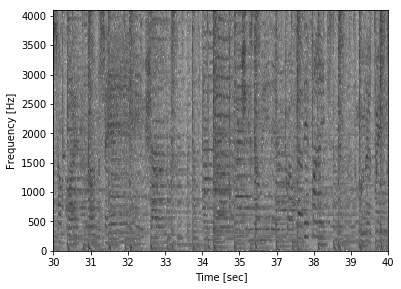

In [179]:
fig, ax = plt.subplots(figsize=(6,6))
s = np.max(sgram) - sgram
ax.imshow(s, aspect=1.7, cmap="gray", origin="lower")
# ax.scatter(x_coords,y_coords,marker="x", color="white")

ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x//43.06640625))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(int(y*21.533203125)))
ax.yaxis.set_major_formatter(ticks_y)

y_ticks_to_plot = [0,500,1000,1500,2000,2500,3000,3500,4000]
plt.yticks(np.array(y_ticks_to_plot)/21.533203125, labels=y_ticks_to_plot)
ax.set_ylim(0,190)
ax.set_xlim(1300,1750)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
plt.savefig("spectogram.png", bbox_inches="tight")
plt.show()

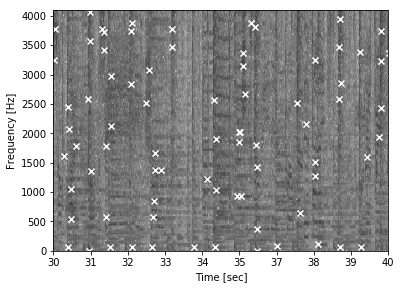

In [180]:
fig, ax = plt.subplots(figsize=(6,6))
s = np.max(sgram) - sgram
ax.imshow(s, aspect=1.7, cmap="gray", origin="lower")
ax.scatter(x_coords,y_coords,marker="x", color="white")

ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x//43.06640625))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(int(y*21.533203125)))
ax.yaxis.set_major_formatter(ticks_y)

y_ticks_to_plot = [0,500,1000,1500,2000,2500,3000,3500,4000]
plt.yticks(np.array(y_ticks_to_plot)/21.533203125, labels=y_ticks_to_plot)
ax.set_ylim(0,190)
ax.set_xlim(1300,1750)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
plt.savefig("spectogram_scatter.png", bbox_inches="tight")
plt.show()